In [1]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

2023-04-28 11:44:13.118804: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 11:44:13.155630: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 11:44:13.156168: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 11:44:13.977803: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


tensorflow version: 2.12.0
Keras version: 2.12.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns
# Step 1. Load train and test data set.
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data() 
# Step 2. check the size of training and test datasets print(X_train_full.dtype, "-", X_train_full.shape)
print(y_train_full.dtype, "-", y_train_full.shape)
print(X_test.dtype, "-", X_test.shape)
print(y_test.dtype, "-", y_test.shape)
# Step 3. Randomly check one of the data points.
X_train_full[30]
y_train_full[30]

2023-04-28 12:18:25.176471: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 12:18:25.314204: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 12:18:25.315070: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 12:18:26.229508: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


11490434/11490434 [==============================] - 0s 0us/step
uint8 - (60000,)
uint8 - (10000, 28, 28)
uint8 - (10000,)


3

In [2]:
# Scale the data b/w 0 and 1 by dividing it by 255 as its unsigned int
X_train_full = X_train_full/255.
X_test = X_test/255.
# View the matrix now. The values will be b/w 0 and 1 X_train_full[30]
# Create the validation data from training data.
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_train.shape
# should give o/p of (55000, 28, 28)
X_valid.shape
# should give o/p of (5000, 28, 28)

(5000, 28, 28)

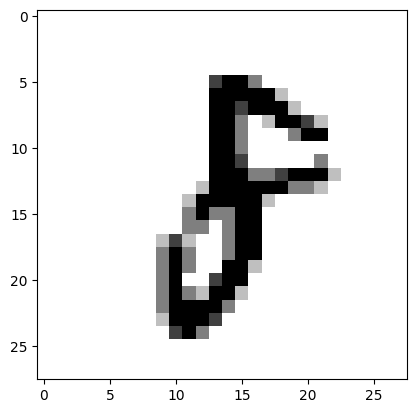

In [3]:
# view the actual image at index 30
plt.imshow(X_train[30], cmap='binary')

<Axes: >

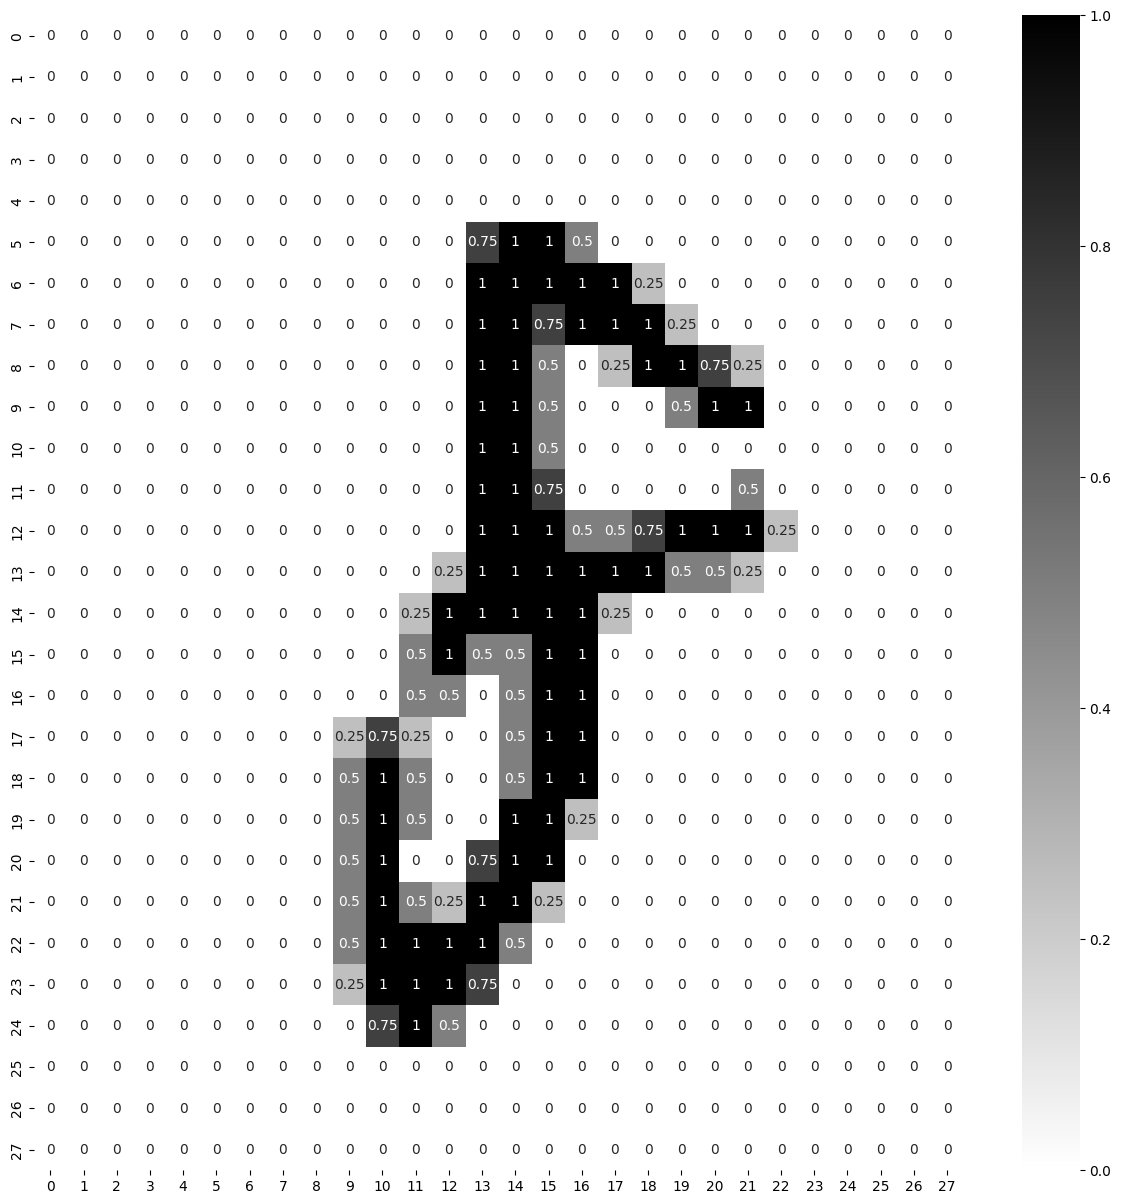

In [4]:
# Lets look at the pixels in detail using SNS
plt.figure(figsize=(15,15))
sns.heatmap(X_train[30], annot=True, cmap='binary')

In [5]:
# lets create the model
# Flatten = make the array to sequential layer
# Dense = creating a hidden OR output layer
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],
name="inputLayer"),
         tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
         tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
         tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]
model = tf.keras.models.Sequential(LAYERS)

2023-04-28 12:20:31.278470: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
#weights should be a metrics of 784 X 300 and biases should be 300
weights.shape
biases.shape
print(weights)
print(biases)

[[ 0.03749566  0.02615947 -0.06618305 ... -0.00968077  0.07204252
  -0.05450182]
 [-0.06307008  0.05866884  0.0462366  ... -0.05092171 -0.00556479
   0.03875595]
 [ 0.03834092  0.00168068  0.04191931 ... -0.0245006  -0.00548164
   0.05059118]
 ...
 [ 0.02991198  0.03678048  0.02609937 ... -0.06097238 -0.05718298
  -0.07285327]
 [ 0.06282353  0.00269115 -0.04554753 ... -0.00932773  0.0495516
  -0.03897395]
 [-0.03317263  0.00682352 -0.00806471 ...  0.05338947  0.02138169
  -0.05052867]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [8]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]
model.compile(loss=LOSS_FUNCTION,
             optimizer=OPTIMIZER,
             metrics=METRICS)

In [9]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)
history = model.fit(X_train, y_train, epochs=EPOCHS,
                   validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5966 - accuracy: 0.8497 - val_loss: 0.2980 - val_accuracy: 0.9184
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2810 - accuracy: 0.9201 - val_loss: 0.2400 - val_accuracy: 0.9310
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2278 - accuracy: 0.9349 - val_loss: 0.1950 - val_accuracy: 0.9470
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1933 - accuracy: 0.9454 - val_loss: 0.1790 - val_accuracy: 0.9492
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1677 - accuracy: 0.9532 - val_loss: 0.1517 - val_accuracy: 0.9576
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1482 - accuracy: 0.9578 - val_loss: 0.1365 - val_accuracy: 0.9646
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1322 - accuracy: 0.9627 - val_loss: 0.1254 - val_accuracy:

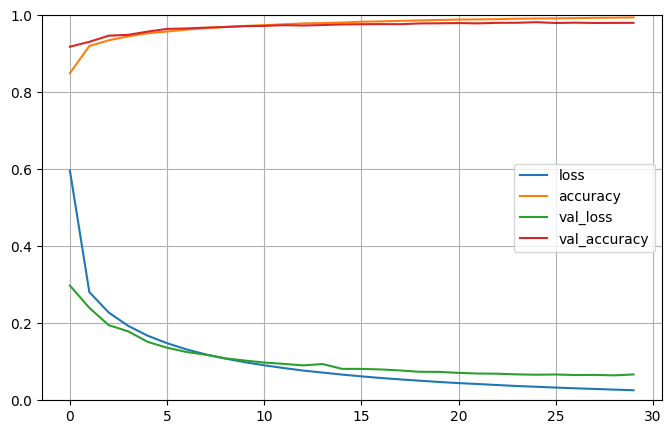

In [10]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [11]:
# validate against test data now
model.evaluate(X_test, y_test)


313/313 [==============================] - 0s 824us/step - loss: 0.0732 - accuracy: 0.9777


[0.07321267575025558, 0.9776999950408936]

1/1 [==============================] - 0s 58ms/step


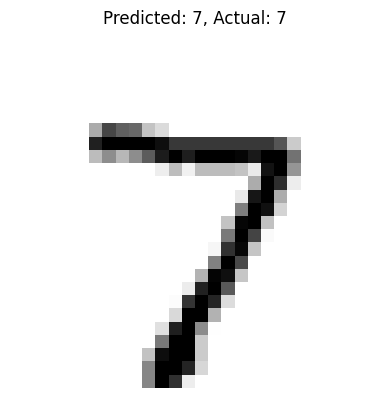

------------------------------------------------------------


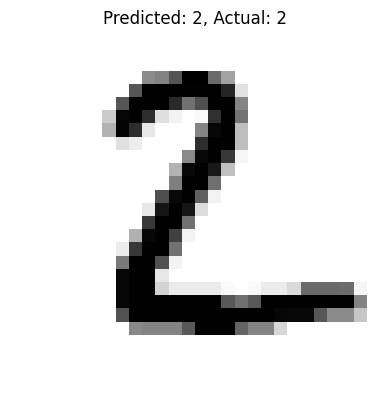

------------------------------------------------------------


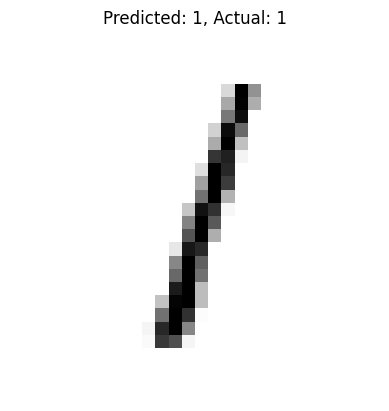

------------------------------------------------------------


In [12]:
X_new = X_test[:3]
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_test_new = y_test[:3]
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)